#Classifier for Articles

Need to make final output csv to feed into the model, then need time to finalize model. Prototype is given below.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/drive/MyDrive/fullMajority.csv')
df2 = pd.read_csv('/content/drive/MyDrive/turkall2_text.csv')
df = pd.merge(df1, df2, left_on='article_id', right_on='url')

In [ ]:
pd.DataFrame(df, columns=["article_id", "text", "Hate_Crime", "Reference_Hate"]).to_csv('fullWithText.csv', index=False)

In [ ]:
#read in raw data from file and return a list of (label, article) tuples
def get_data(filename): 
	data = [line.strip().split('\t') for line in open(filename).readlines()]
	random.shuffle(data)
	return data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

df = pd.read_csv("/content/drive/MyDrive/NETS213fullWithText - fullWithText.csv")
ogLen = len(df)
dfANS = pd.read_csv("/content/testingDataFinal.csv")
df = df.append(dfANS)
nX = df["text"]
ny = df["Hate_Crime"]
headers = []
labels = []
for i in nX:
  headers.append(i)

for i in ny:
  labels.append(i)

X = np.array(headers)
y = np.array(labels)

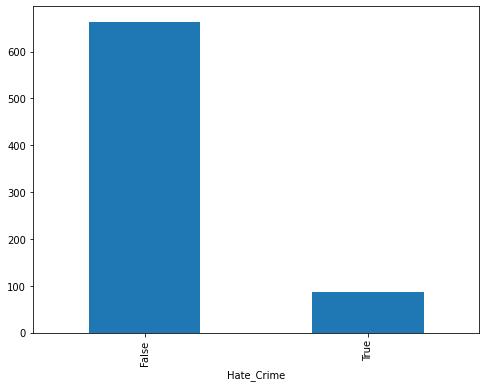

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Hate_Crime').text.count().plot.bar(ylim=0)
plt.show()

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np

df = df[['text', 'Reference_Hate']]
category_id_df = df[['text', 'Reference_Hate']].drop_duplicates().sort_values('Reference_Hate')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['Reference_Hate', 'text']].values)
df.head()

,text,Reference_Hate
0,rice lake wi a gay employee of applebees in ...,False
1,heard the news if you only consume the mainstr...,False
2,cayer matches his teaching style to the energy...,False
3,get off of the regular annual all access rat...,False
4,the fauquier times is honored to serve as your...,False


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
# pd.DataFrame(df.text, columns=["article_id", "text", "Hate_Crime", "Reference_Hate"]).to_csv('fsadkjfsa.csv', index=False)

featuresSuper = tfidf.fit_transform(df.text).toarray()
features = featuresSuper[:ogLen]
featuresTest = featuresSuper[-len(dfANS):]

print((featuresTest).shape)

labelsSuper = df.Hate_Crime
labels = labelsSuper.head(ogLen)
labelsTest = labelsSuper.tail(len(dfANS))

(149, 4546)


In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

[Text(0, 0, 'RandomForestClassifier'),
 Text(0, 0, 'LinearSVC'),
 Text(0, 0, 'MultinomialNB'),
 Text(0, 0, 'LogisticRegression')]

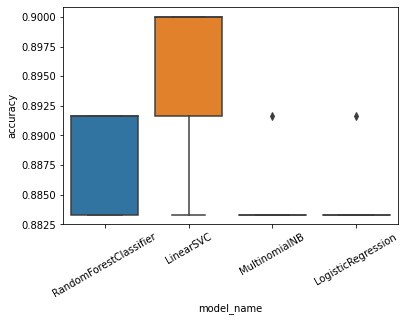

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
models = [
    RandomForestClassifier(n_estimators=200, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    # SVC(C=1.0, kernel='linear', degree=3, gamma='auto'),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
chart = sns.boxplot(x='model_name', y='accuracy', data=cv_df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=30)
# sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
#               size=8, jitter=True, edgecolor="gray", linewidth=2)


# plt.show()

[Text(0, 0, 'RandomForestClassifier'),
 Text(0, 0, 'LinearSVC'),
 Text(0, 0, 'MultinomialNB'),
 Text(0, 0, 'LogisticRegression')]

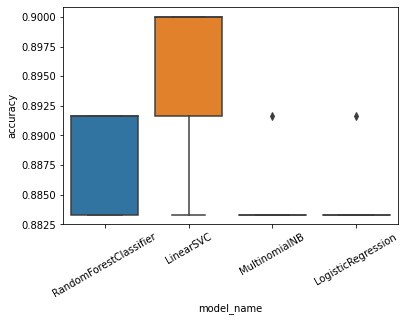

In [ ]:

chart = sns.boxplot(x='model_name', y='accuracy', data=cv_df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=30)

In [ ]:
testfile = "/content/testingData - save2_text (1).csv"
df3 = pd.read_csv(testfile)['text']
models[3].fit(features,labels)

y_pred = models[3].predict(featuresTest)

In [ ]:
import torch 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(labelsTest, y_pred))
print(classification_report(labelsTest, y_pred))
# torch.save(model.state_dict(), '/content/drive/MyDrive/model')

[[132   0]
 [ 17   0]]
              precision    recall  f1-score   support

       False       0.89      1.00      0.94       132
        True       0.00      0.00      0.00        17

    accuracy                           0.89       149
   macro avg       0.44      0.50      0.47       149
weighted avg       0.78      0.89      0.83       149



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
import pickle
cv_df.groupby('model_name').accuracy.mean()
#For Downloading Model
filename = 'logreg_real_ref.sav'
pickle.dump(models[3], open(filename, 'wb'))